## Import the Librairies

In [2]:
#Import the librairies
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from mlxtend.plotting import plot_decision_regions
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
import matplotlib.pyplot as plt

import seaborn as sns

#Import the dataset
data = '/Users/nicolaswilliams/Downloads/dmahmeq.csv'
home_df = pd.read_csv(data)
print(home_df.head())

   bad  loan  mortdue     value   reason     job   yoj  derog  delinq   clage  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.37   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.83   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.47   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.33   

   ninq  clno  debtinc  
0   1.0   9.0      NaN  
1   0.0  14.0      NaN  
2   1.0  10.0      NaN  
3   NaN   NaN      NaN  
4   0.0  14.0      NaN  


## 2.A1 - Data Strcuture

In [3]:
# Data Structure 
print('\n1. BASIC DATASET INFO:')
print(f'Dataset shape: {home_df.shape}')
print(f'Dataset rows: {home_df.shape[0]}')
print(f'Dataset columns: {home_df.shape[1]}')

print('\n2. COLUMN INFORMATION:')
print(home_df.info())

print('\n3. DATA TYPES:')
print(home_df.dtypes)
numeric_variables = ['bad', 'loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']
categorical_variables = ['reason', 'job']
print("Numerical Variables Columns:", numeric_variables)
print("Categorical Variables Columns:", categorical_variables)


# Missing Value 
print('\n4. MISSING VALUES COUNT:')
missing_values = home_df.isnull().sum() 
print(missing_values)

# Looking into the categorical values
print('\n5. CATEGORICAL VALUES:')
for col in categorical_variables:
  print(f"\nValue counts for {col}:")
  print(home_df[col].value_counts())  

# Summary statistics 
print('\n6. SUMMARY STATISTICS:')
home_df.describe()


1. BASIC DATASET INFO:
Dataset shape: (5960, 13)
Dataset rows: 5960
Dataset columns: 13

2. COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      5960 non-null   int64  
 1   loan     5960 non-null   int64  
 2   mortdue  5442 non-null   float64
 3   value    5848 non-null   float64
 4   reason   5708 non-null   object 
 5   job      5681 non-null   object 
 6   yoj      5445 non-null   float64
 7   derog    5252 non-null   float64
 8   delinq   5380 non-null   float64
 9   clage    5652 non-null   float64
 10  ninq     5450 non-null   float64
 11  clno     5738 non-null   float64
 12  debtinc  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB
None

3. DATA TYPES:
bad          int64
loan         int64
mortdue    float64
value      float64
reason      object
job         object
yoj        

,bad,loan,mortdue,value,yoj,derog,delinq,clage,ninq,clno,debtinc
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766276,1.186055,21.296096,33.779918
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810108,1.728675,10.138933,8.601747
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524000
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.117500,0.000000,15.000000,29.140000
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.470000,1.000000,20.000000,34.818000
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562500,2.000000,26.000000,39.003000
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.230000,17.000000,71.000000,203.312000


## 2.A1 - Data Vizualisation

### Heat Map

   bad  loan  mortdue     value   reason     job   yoj  derog  delinq   clage  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.37   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.83   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.47   
3    1  1500      NaN       NaN      NaN     NaN   NaN    NaN     NaN     NaN   
4    0  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.33   

   ninq  clno  debtinc  
0   1.0   9.0      NaN  
1   0.0  14.0      NaN  
2   1.0  10.0      NaN  
3   NaN   NaN      NaN  
4   0.0  14.0      NaN  
   bad  loan  mortdue     value   reason     job   yoj  derog  delinq   clage  \
0    1  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.37   
1    1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.83   
2    1  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.47   
3    1  1500      NaN       NaN      Na

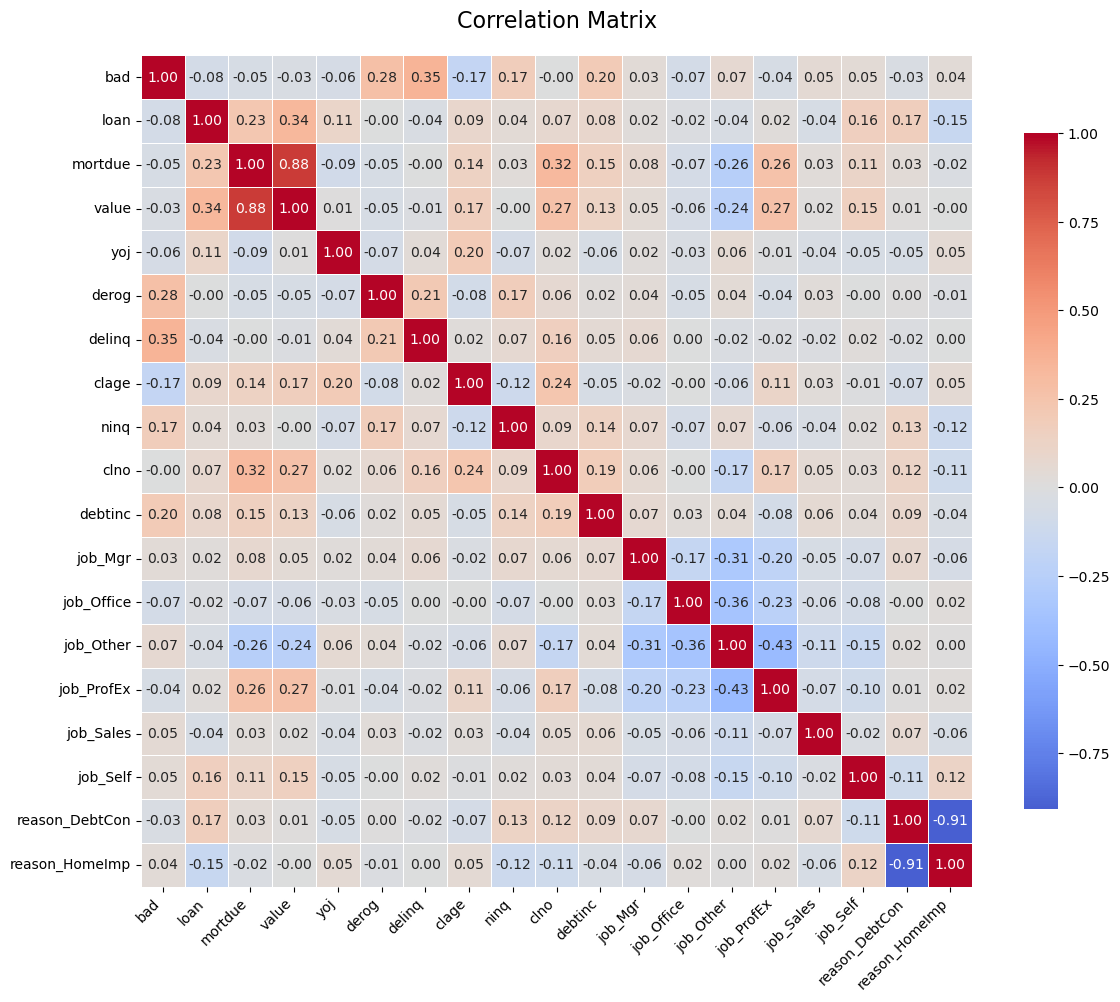

In [46]:
data = '/Users/nicolaswilliams/Downloads/dmahmeq.csv'
home_df = pd.read_csv(data)
print(home_df.head())
home_df_model = home_df.copy()
print(home_df_model.head())

home_df_model = pd.get_dummies(home_df_model, columns=["job", "reason"], drop_first = False, dtype = 'int')

print("\nNew features:")
print(home_df_model.columns.tolist())
print(f"\nShape: {home_df_model.shape}")

# Calculate correlation matrix
corr_train = home_df_model.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 10))  
sns.heatmap(corr_train, annot=True, cmap='coolwarm', fmt='.2f', 
            square=True, cbar_kws={"shrink": .8}, linewidths=0.5, center=0)                
plt.title('Correlation Matrix', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right')  
plt.yticks(rotation=0)               
plt.tight_layout()                   
plt.show()

### Scatterplots

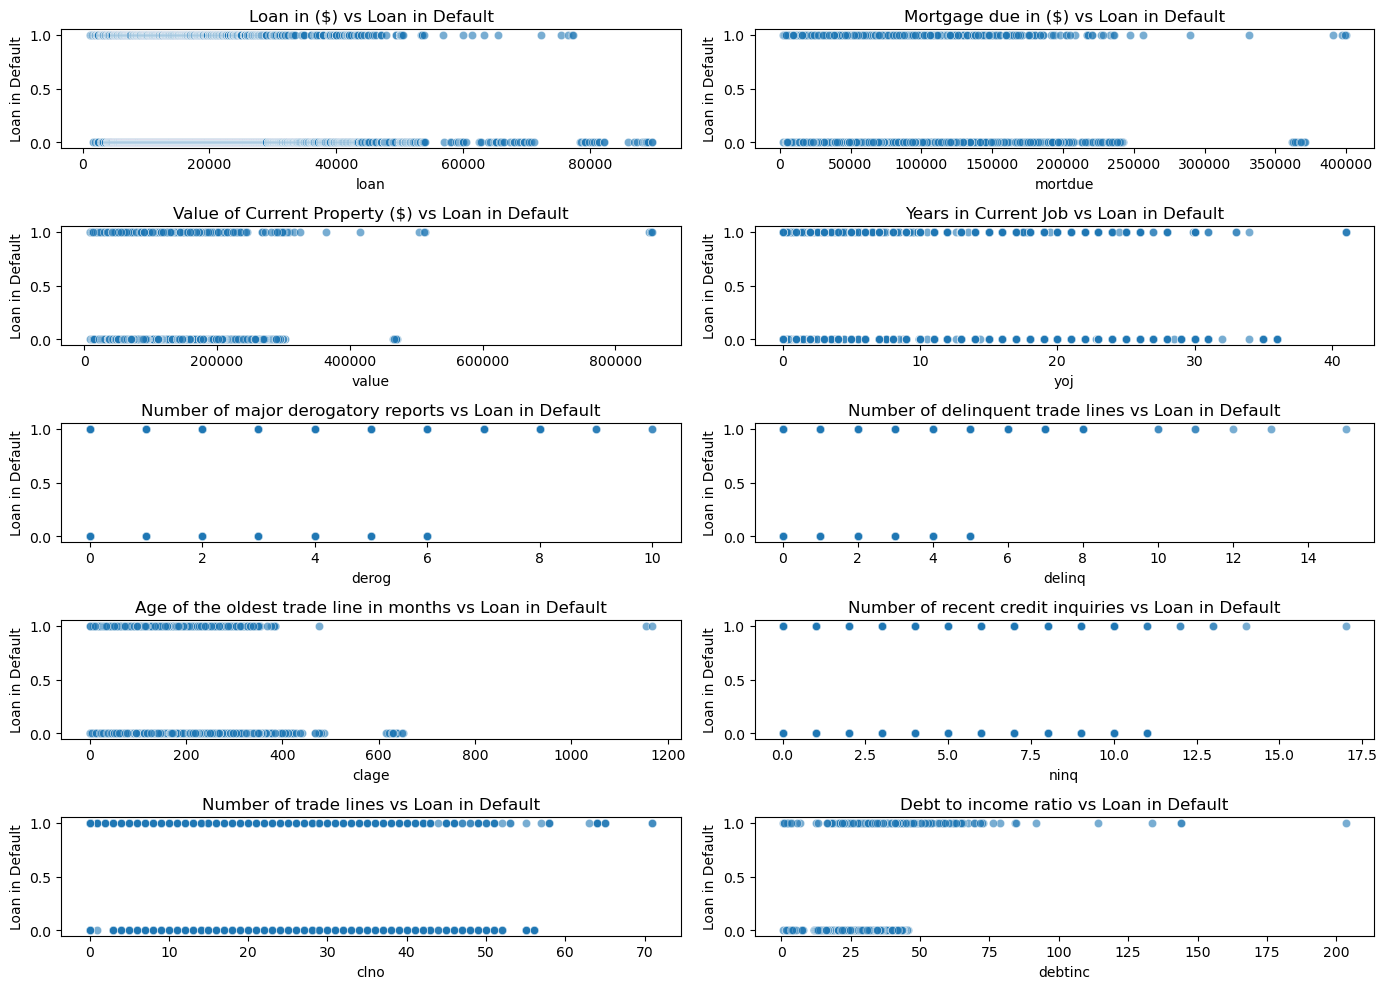

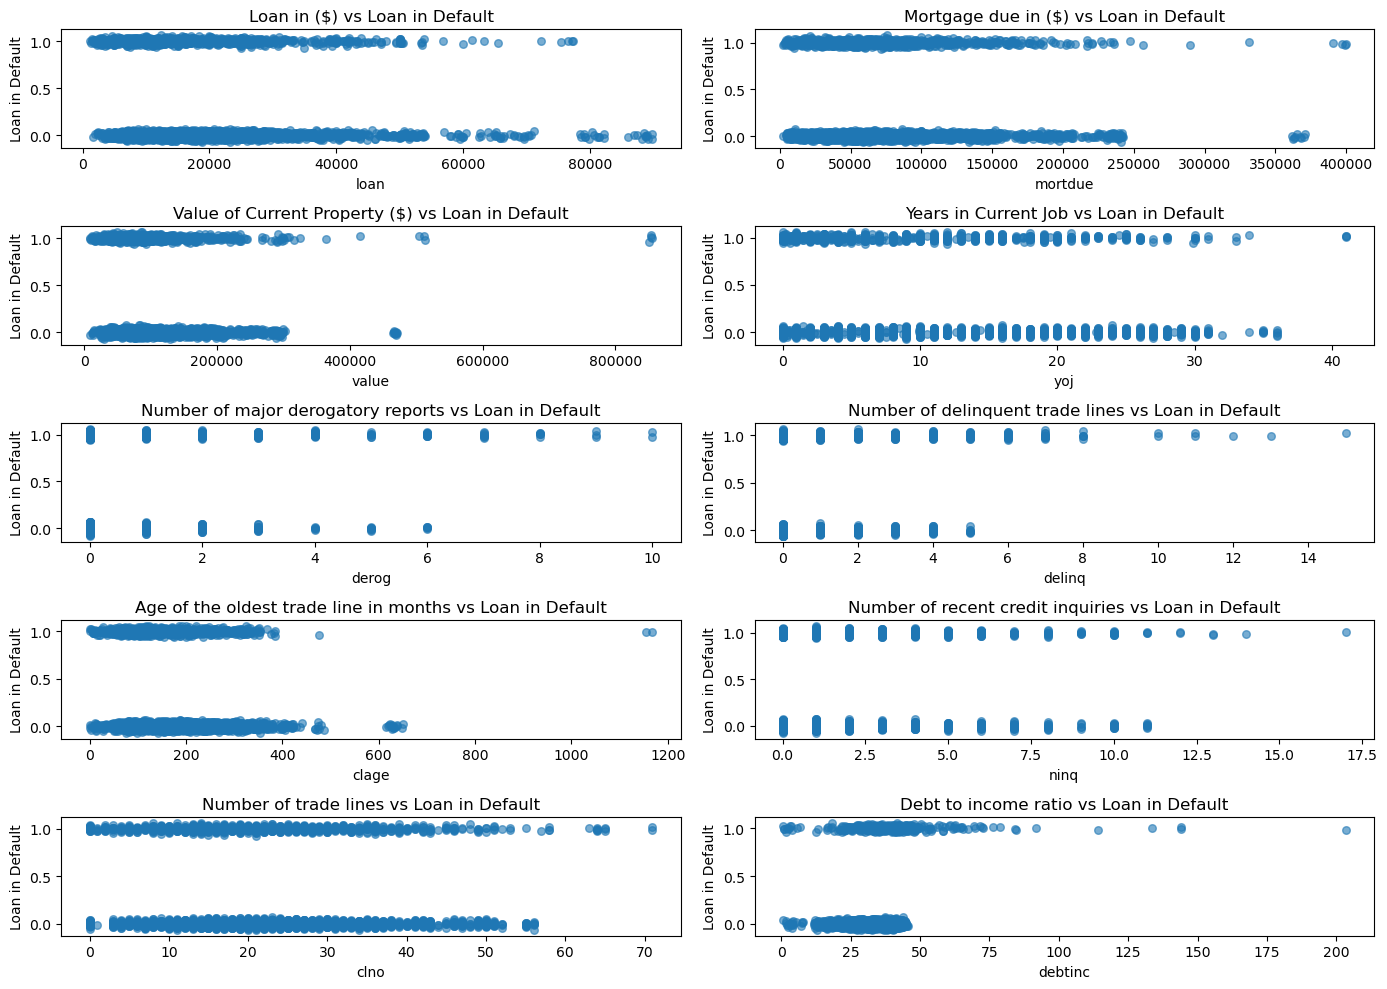

In [22]:
#Scatter charts (numerical vs bad)
scatter_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']
titles = [
  "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio"
]
fig, axes = plt.subplots(5, 2, figsize=(14, 10))
axes = axes.ravel()
for i, col in enumerate(scatter_vars):
    sns.scatterplot(data=home_df, x=col, y='bad', ax=axes[i], alpha=0.6)
    axes[i].set_title(f"{titles[i]} vs Loan in Default")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Loan in Default")
plt.tight_layout()
plt.show()

#Scatter charts (numerical vs bad) with noise
scatter_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq',
                'clage', 'ninq', 'clno', 'debtinc', 
               ]
titles = [
  "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio",
        ]
fig, axes = plt.subplots(5, 2, figsize=(14, 10))
axes = axes.ravel()
for i, col in enumerate(scatter_vars):
    # Add jitter to the 'bad' column for better visualization
    jittered_bad = home_df['bad'] + np.random.normal(0, 0.02, size=len(home_df))
    axes[i].scatter(home_df[col], jittered_bad, alpha=0.6, s=30)
    axes[i].set_title(f"{titles[i]} vs Loan in Default")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Loan in Default")
plt.tight_layout()
plt.show()

### Histograms

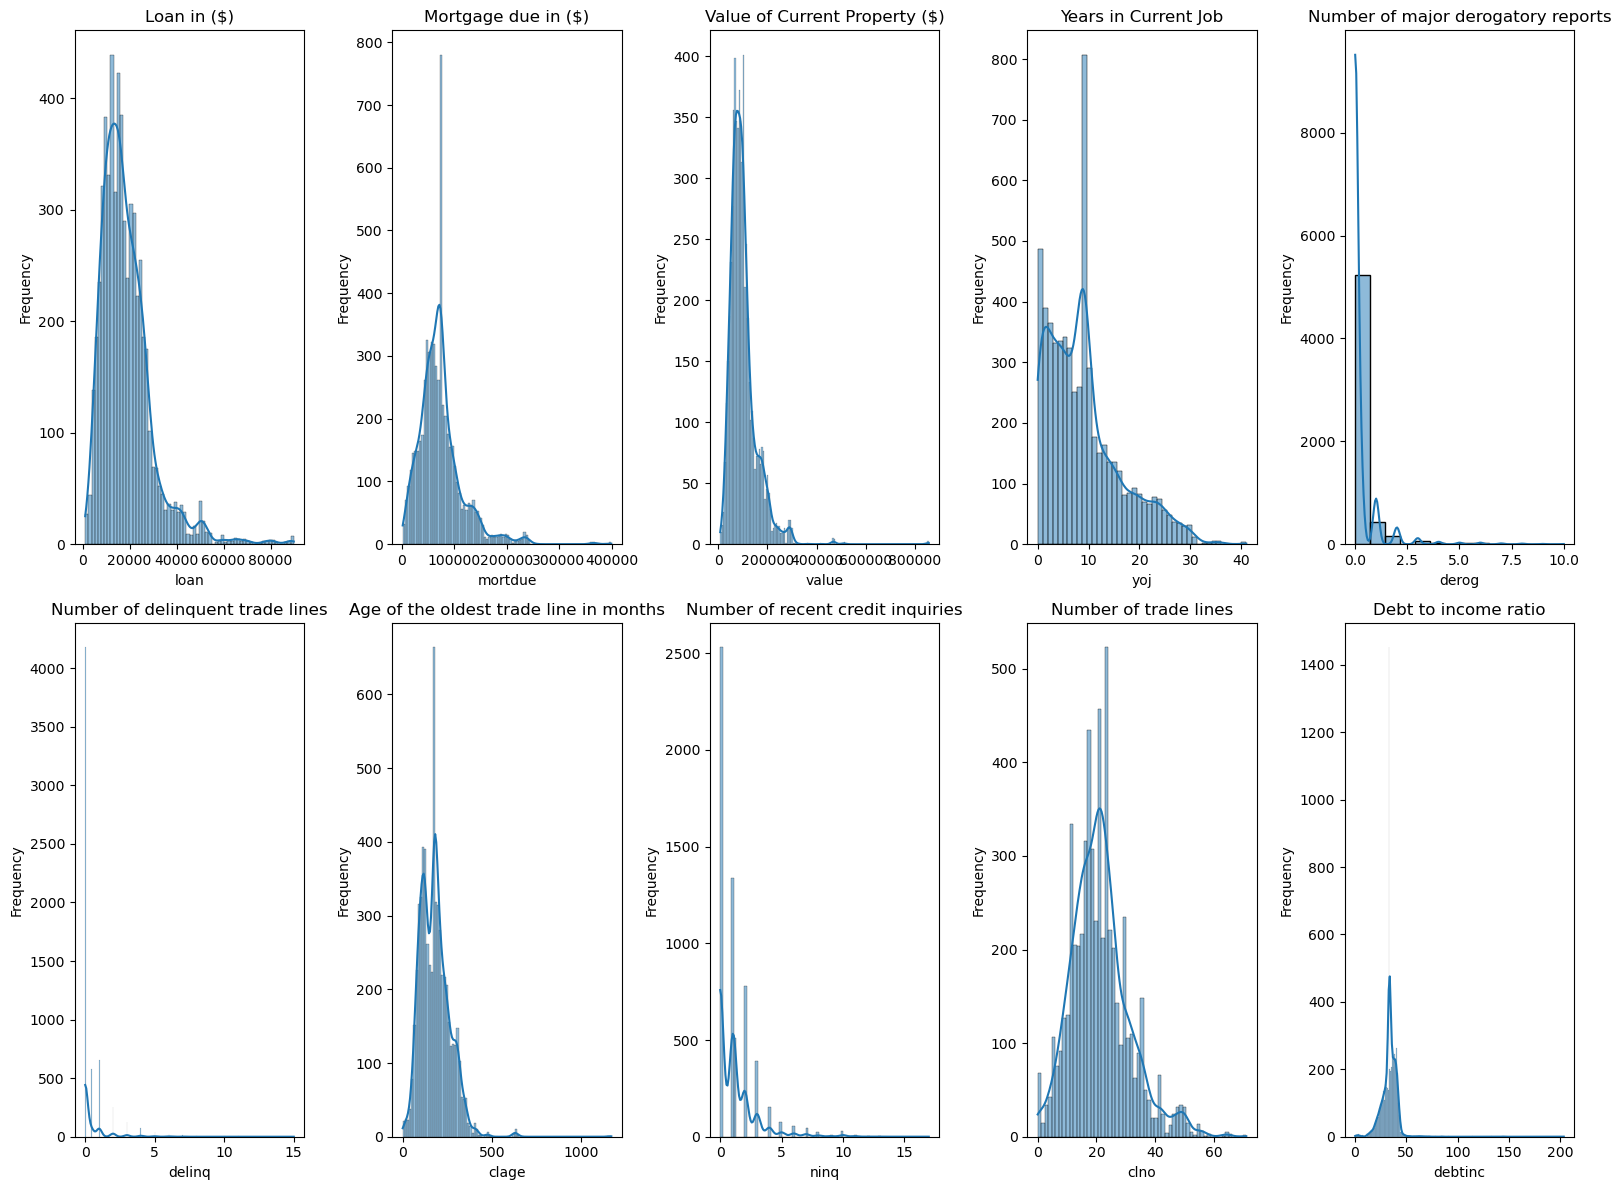

In [60]:
# Create a list of titles 
titles = [
     "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio" ]
# Prepare the variables
histo_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']
# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 5, figsize=(16, 12))
axes = axes.ravel()  # Flatten the axes array for easier indexing
for i, col in enumerate(histo_vars):
    sns.histplot(data=home_df, x=col, kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

### Bar Charts

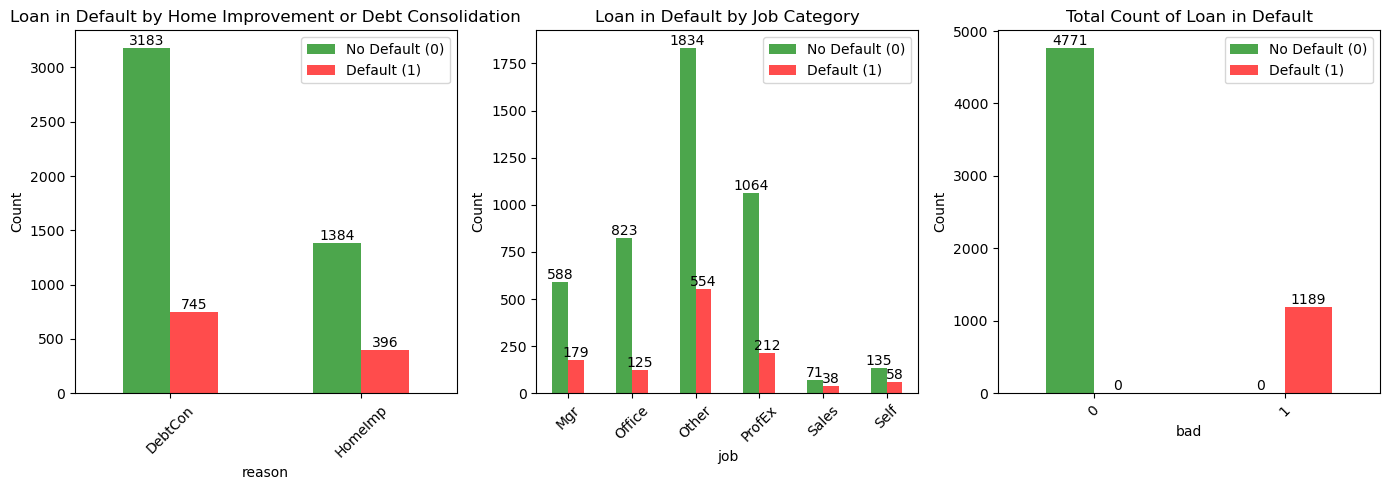

In [14]:
# Create a list of titles 
titles = ["Loan in Default by Home Improvement or Debt Consolidation", "Loan in Default by Job Category", 'Total Count of Loan in Default']
# Prepare the variables
bars_vars = ['reason', 'job', 'bad']
# Bar charts for categorical counts
fig, axes = plt.subplots(1, 3, figsize=(14, 5)) 
axes = axes.ravel() 

for i, cat_col in enumerate(bars_vars):
    # Create crosstab to count defaults vs non-defaults
    counts = pd.crosstab(home_df[cat_col], home_df['bad'])
    counts.plot(kind='bar', ax=axes[i], color=['green', 'red'], alpha=0.7)
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(cat_col)
    axes[i].set_ylabel("Count")
    axes[i].legend(['No Default (0)', 'Default (1)'], loc='upper right')
    axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45)

 #Add count labels on top of each bar
    for patch in axes[i].patches:
        axes[i].text(patch.get_x() + patch.get_width()/2., patch.get_height(),
                     f'{int(patch.get_height())}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

## 2.A2 - Association with loan default

## 2.A3 - Variables’ distributions

Log transformed variables: ['loan', 'mortdue', 'value', 'clage', 'clno', 'debtinc']
Scaled variables: ['derog', 'delinq', 'ninq', 'yoj']

Transformed data:
   bad      loan   mortdue     value       yoj     derog    delinq     clage  \
0    1  0.241338  0.246344  0.246827  0.208329 -0.300922 -0.398738  0.352638   
1    1  0.241683  0.247466  0.247441 -0.253822 -0.300922  1.375631  0.354832   
2    1  0.241970  0.245521  0.245799 -0.649951 -0.300922 -0.398738  0.356473   
3    1  0.241970       NaN       NaN       NaN       NaN       NaN       NaN   
4    0  0.242213  0.247809  0.247945 -0.781994 -0.300922 -0.398738  0.352539   

       ninq      clno  debtinc  job_Mgr  job_Office  job_Other  job_ProfEx  \
0 -0.107639  0.218985      NaN        0           0          1           0   
1 -0.686169  0.223136      NaN        0           0          1           0   
2 -0.107639  0.220057      NaN        0           0          1           0   
3       NaN       NaN      NaN        0           0

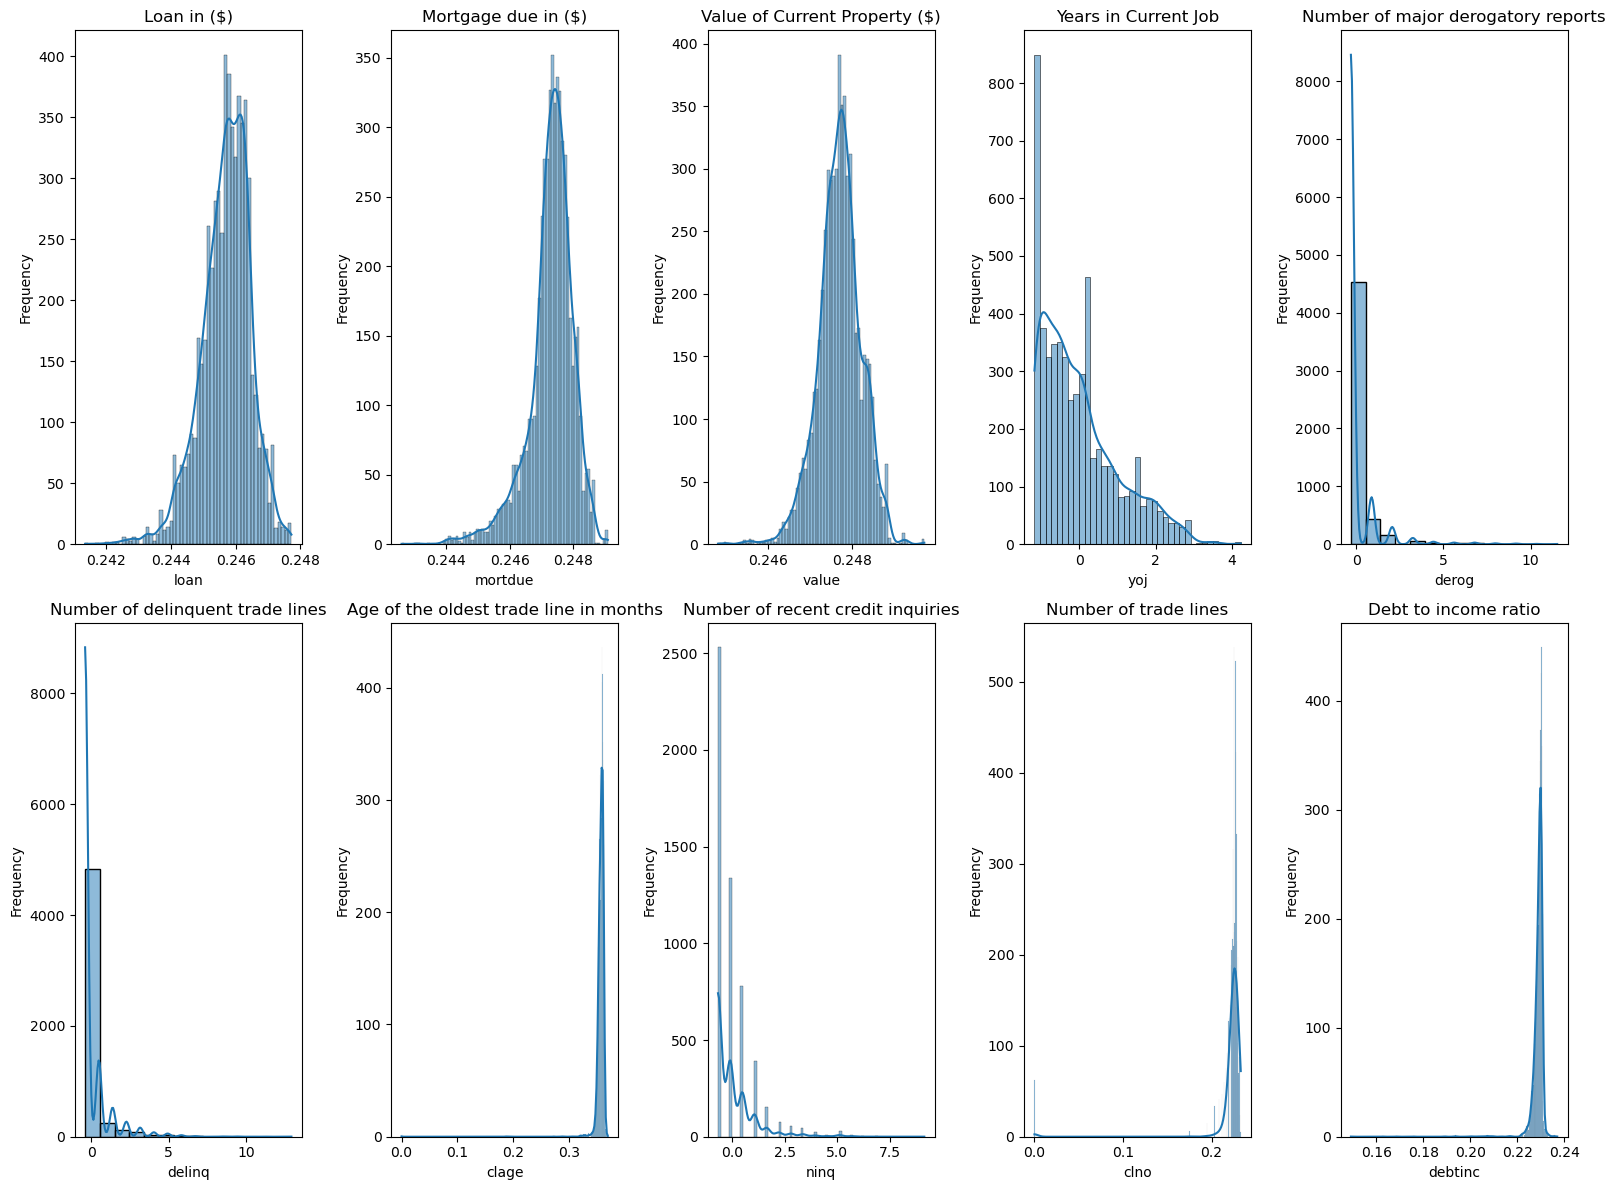

In [59]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Variables to log transform
log_vars = ['loan', 'mortdue', 'value', 'clage', 'clno', 'debtinc']
# Variables to scale
scale_vars = ['derog', 'delinq', 'ninq', 'yoj']

# Log transform (add 1 to avoid log(0))
for col in log_vars:
    home_df_model[col] = np.log1p(home_df_model[col])

# Scale using StandardScaler
scaler = StandardScaler()
home_df_model[scale_vars] = scaler.fit_transform(home_df_model[scale_vars])

print("Log transformed variables:", log_vars)
print("Scaled variables:", scale_vars)
print("\nTransformed data:")
print(home_df_model.head())
print(f"\nShape: {home_df_model.shape}")

# Create a list of titles 
titles = [
    "Loan in ($)", "Mortgage due in ($)",
    "Value of Current Property ($)", "Years in Current Job", 
    "Number of major derogatory reports", "Number of delinquent trade lines", 
    "Age of the oldest trade line in months",
    "Number of recent credit inquiries","Number of trade lines","Debt to income ratio" 
]

# Prepare the variables
histo_vars = ['loan', 'mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage','ninq','clno','debtinc']

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 5, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(histo_vars):
    sns.histplot(data=home_df_model, x=col, kde=True, ax=axes[i])
    
    # Set the title and labels
    axes[i].set_title(titles[i])
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')
# Adjust the layout
plt.tight_layout()
# Show the plot
plt.show()

## 2.A4 - Impoute missing Variables

In [47]:
# Where are the missing values?
missing_vals = home_df.isnull().sum()
# Display the columns with missing values  
missing_vals.index[missing_vals>0]
missing_num_vals = ['mortdue', 'value', 'yoj', 'derog', 'delinq', 'clage', 'ninq', 'clno', 'debtinc']

# Imput the missing values with the mean of the column using sklearn's SimpleImputer
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
# Fit the imputer on the DataFrame
home_df[missing_num_vals] = imp_mean.fit_transform(home_df[missing_num_vals])
home_df['reason'] = home_df['reason'].fillna(home_df['reason'].mode()[0])
home_df['job'] = home_df['job'].fillna(home_df['job'].mode()[0])

# Verify no missing values remain
print(home_df.isnull().sum())
print(home_df.head())

bad        0
loan       0
mortdue    0
value      0
reason     0
job        0
yoj        0
derog      0
delinq     0
clage      0
ninq       0
clno       0
debtinc    0
dtype: int64
   bad  loan     mortdue          value   reason     job        yoj    derog  \
0    1  1100  25860.0000   39025.000000  HomeImp   Other  10.500000  0.00000   
1    1  1300  70053.0000   68400.000000  HomeImp   Other   7.000000  0.00000   
2    1  1500  13500.0000   16700.000000  HomeImp   Other   4.000000  0.00000   
3    1  1500  73760.8172  101776.048741  DebtCon   Other   8.922268  0.25457   
4    0  1700  97800.0000  112000.000000  HomeImp  Office   3.000000  0.00000   

     delinq       clage      ninq       clno    debtinc  
0  0.000000   94.370000  1.000000   9.000000  33.779918  
1  2.000000  121.830000  0.000000  14.000000  33.779918  
2  0.000000  149.470000  1.000000  10.000000  33.779918  
3  0.449442  179.766276  1.186055  21.296096  33.779918  
4  0.000000   93.330000  0.000000  14.000000  3

## 2.A5 - Partition the data 50/30/20% respectively (Use random_state=42)

In [49]:
from sklearn.model_selection import train_test_split

#Split the data into temp and test sets
temp_df, train_df = train_test_split(home_df, test_size=0.5, random_state=42)

#Split the data into train and validation sets
test_df, validation_df = train_test_split(temp_df, test_size=0.6, random_state=42)

#Print the shapes
print(f"Train set: {train_df.shape[0]}")
print(f"Validation shape: {validation_df.shape[0]}")
print(f"Test shape: {test_df.shape[0]}")

Train set: 2980
Validation shape: 1788
Test shape: 1192
